## 1. 이미지 읽고 , 이미지에서 얼굴 찾기

In [2]:
from deepface import DeepFace
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'fastmtcnn',
]


In [4]:
# 이미지 읽기
image_path = "../test_image/song_park_cha.jpg"
image = cv.imread(image_path)

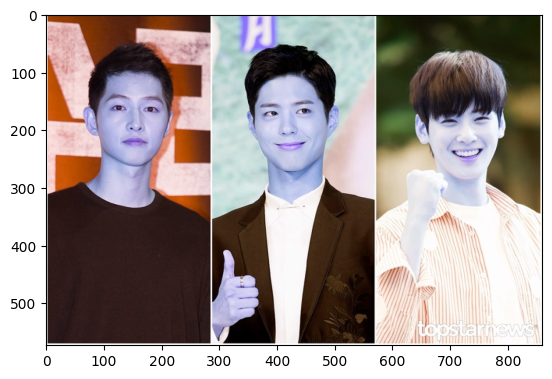

In [5]:
plt.imshow(image)

In [6]:
# 이미지 색상 변경하기 
cvt_image=cv.cvtColor(image, cv.COLOR_BGR2RGB)

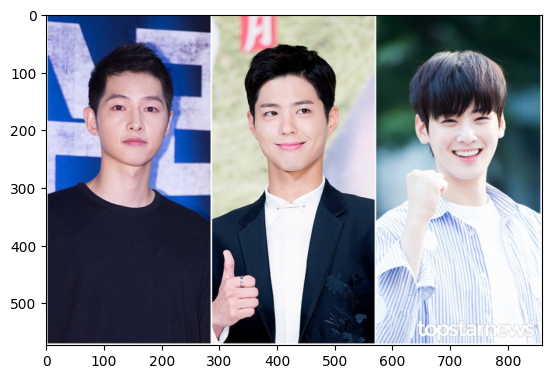

In [7]:
plt.imshow(cvt_image)

In [8]:
# 얼굴 찾기 Object detection
face_objs = DeepFace.extract_faces(img_path = image_path,         target_size = (224, 224),         detector_backend = backends[4]) 

In [9]:
# 찾은 정보 중에 원하는 정보 2점 찾기! 
face_points = []
box_image = cvt_image.copy()
for i in range(len(face_objs)):
    pt1=(face_objs[i]["facial_area"]["x"],face_objs[i]["facial_area"]["y"])
    pt2=(face_objs[i]["facial_area"]["x"]+face_objs[i]["facial_area"]["w"],face_objs[i]["facial_area"]["y"]+face_objs[i]["facial_area"]["h"])
    color=(255,0,0)
    box_image=cv.rectangle(box_image, pt1, pt2, color,5) 
    face_points.append([pt1[0],pt1[1],pt2[0],pt2[1]])

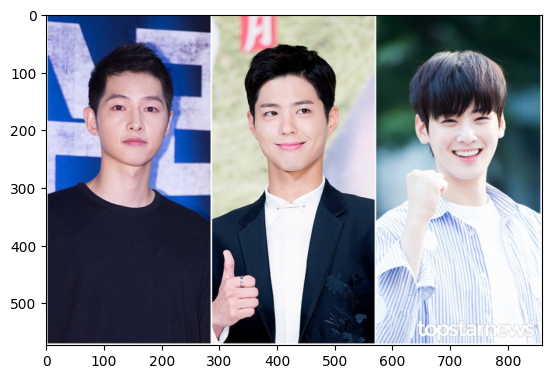

In [10]:
plt.imshow(cvt_image)

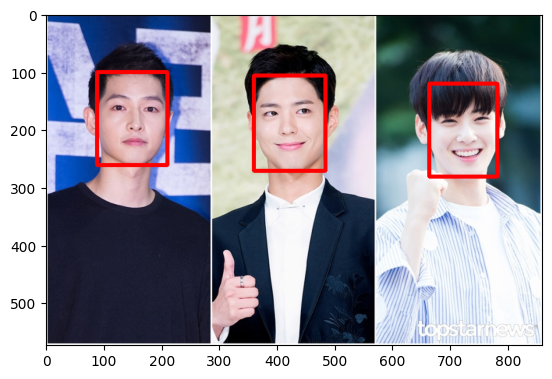

In [11]:
plt.imshow(box_image)

In [12]:
face_points

[[664, 120, 782, 281], [360, 106, 484, 271], [88, 100, 210, 261]]

True

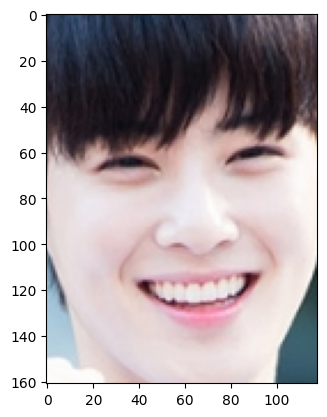

In [18]:
plt.imshow(cvt_image[120:281,664:782])
cv.imwrite("../cropped/test.jpg", image[120:281,664:782])

In [26]:
def find_face(image_path):
    backends = [
        'opencv', 
        'ssd', 
        'dlib', 
        'mtcnn', 
        'retinaface', 
        'mediapipe',
        'yolov8',
        'yunet',
        'fastmtcnn',
        ]
    
    face_objs = DeepFace.extract_faces(img_path = image_path, target_size = (224, 224),detector_backend = backends[4]) 
    face_points = []
    box_image = cvt_image.copy()
    for i in range(len(face_objs)):
        pt1=(face_objs[i]["facial_area"]["x"],face_objs[i]["facial_area"]["y"])
        pt2=(face_objs[i]["facial_area"]["x"]+face_objs[i]["facial_area"]["w"],face_objs[i]["facial_area"]["y"]+face_objs[i]["facial_area"]["h"])
        color=(255,0,0)
        box_image=cv.rectangle(box_image, pt1, pt2, color,5) 
        face_points.append([pt1[0],pt1[1],pt2[0],pt2[1]])

    return face_points

def crop_face(image_path, save_path, face_points):
    image = cv.imread(image_path)
    for i in range(len(face_points)):
        cv.imwrite(save_path+str(i)+".jpg", image[face_points[i][1]:face_points[i][3],face_points[i][0]:face_points[i][2]])

    

In [22]:
face_list = find_face("../test_image/song_park_cha.jpg")

In [27]:
crop_face("../test_image/song_park_cha.jpg","../cropped/new",face_list)